In [1]:
import os
import csv
import pandas as pd
import numpy as np

import datetime
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import squarify

from sklearn import model_selection, preprocessing, metrics
plt.style.use('fivethirtyeight')

print(os.getcwd())
print(os.listdir("../input/"))

/kaggle/working
['acm.csv']


In [2]:
#load dataframe from csv
df = pd.read_csv("../input/acm.csv")

In [ ]:
df.info()

In [ ]:
df

In [ ]:
df[df["Index_Id"] == 289023]

***count_reference*** represents the number of times particular paper got referred in our dataset

In [3]:
df["count_reference"] = 0

In [ ]:
df.isna().sum()

####YEAR

In [ ]:
df["Year"] = df["Year"].fillna(0)
df["Year"] = df["Year"].astype(int)

**Rows with NaN year**

In [ ]:
df[df["Year"] == 0]

***Year of publication distribution in the data***

In [ ]:
ydf = df[df["Year"]!=0]
plt.figure(figsize=(8,6))
plt.scatter(range(ydf.shape[0]), np.sort(ydf["Year"].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.title("Year Distribution", fontsize=20) 
plt.show()

In [ ]:
df.isna().sum()

In [ ]:
print(df.dtypes)

In [ ]:
df["Index_Id"].unique()
print(any(df['Index_Id'].duplicated())) 
print(len(df['Index_Id'].unique()))
print(len(df.index))

Index_Id = 2381731 is duplicated 9 times , It points to 7 different papers and has 82080 references.

In [ ]:
df[df.duplicated(subset="Index_Id")]

In [4]:
reference_count = {}
for references in df[df["References_Id"].notnull()]["References_Id"]:
    ref_list = map(int,references.strip(":").split(":"))
    for ref in ref_list:
        if ref in reference_count:
            reference_count[ref] += 1
        else:
            reference_count[ref] = 1
print(reference_count[2381731])

82080


In [5]:
def update_ref_count(row):
    if row['Index_Id'] in reference_count:
        return reference_count[row['Index_Id']]
    else:
        return 0
df["count_reference"] = df.apply(lambda row: update_ref_count(row),axis=1)

In [ ]:
print(df.head(5))

In [14]:
sorted_by_value = sorted(reference_count.items(), key=lambda kv: kv[1],reverse=True)
print(sorted_by_value[:10])
print([row[0] for row in sorted_by_value[:10]])
print([row[1] for row in sorted_by_value[:10]])

[(2135000, 938039), (2381731, 82080), (408395, 8620), (369235, 6526), (190580, 5297), (136349, 4882), (168250, 4717), (729436, 4490), (760804, 4167), (115607, 3452)]
[2135000, 2381731, 408395, 369235, 190580, 136349, 168250, 729436, 760804, 115607]
[938039, 82080, 8620, 6526, 5297, 4882, 4717, 4490, 4167, 3452]


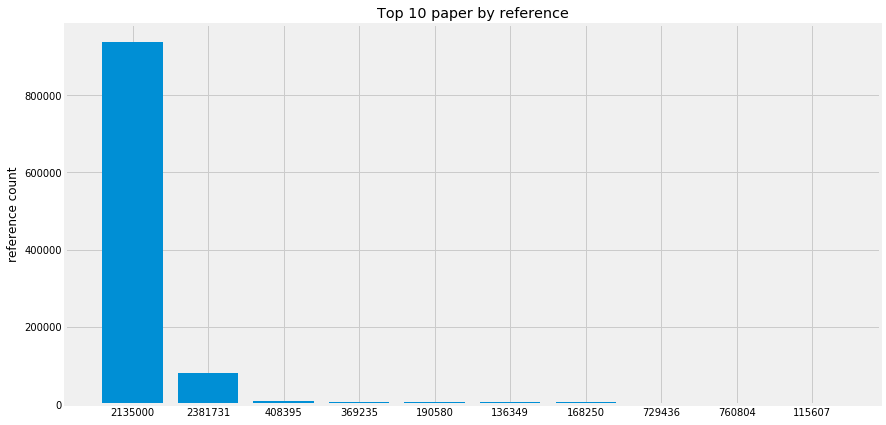

In [21]:
x_values = [row[0] for row in sorted_by_value[:10]]
y_values = [row[1] for row in sorted_by_value[:10]]
x_pos = np.arange(len(x_values))
plt.figure(figsize=(13,7))
plt.bar(x_pos,y_values, align='center', alpha=1)
plt.xticks(x_pos,x_values)
plt.ylabel('reference count')
plt.title('Top 10 paper by reference')
 
plt.show()